<h1> Deep CNN Image Classifier with any images</>

In [2]:
import tensorflow as tf
import os

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
import cv2
import imghdr

C:\Users\mukes\AppData\Local\Temp\ipykernel_620\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = 'data'
image_exts = ['jpeg','jpg','bmp','png']
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in extention list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))
            

Image not in extention list data\happy\depositphotos_391577690-stock-photo-cheerful-woman-outstretched-hands-sitting.jpg
Image not in extention list data\happy\depositphotos_53010223-stock-photo-free-happy-girl-on-beach.jpg
Image not in extention list data\happy\depositphotos_656997976-stock-photo-happy-different-young-people-having.jpg
Image not in extention list data\happy\getty_152414899_97046097045006_68075.jpg
Image not in extention list data\happy\getty_478389113_970647970450091_99776.jpg
Image not in extention list data\happy\Happy20People.jpg
Image not in extention list data\sad\asian-woman-sad-angry-serious-footage-027498141_iconl.jpeg
Image not in extention list data\sad\depositphotos_241356586-stock-photo-portrait-sad-depressed-young-man.jpg
Image not in extention list data\sad\depositphotos_86851530-stock-photo-close-up-of-african-young.jpg
Image not in extention list data\sad\man-with-head-down.jpg
Image not in extention list data\sad\soul.gif


In [6]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [7]:
import numpy as np
import matplotlib.pyplot as plt 

In [31]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 164 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [13]:
batch[0].shape

(32, 256, 256, 3)

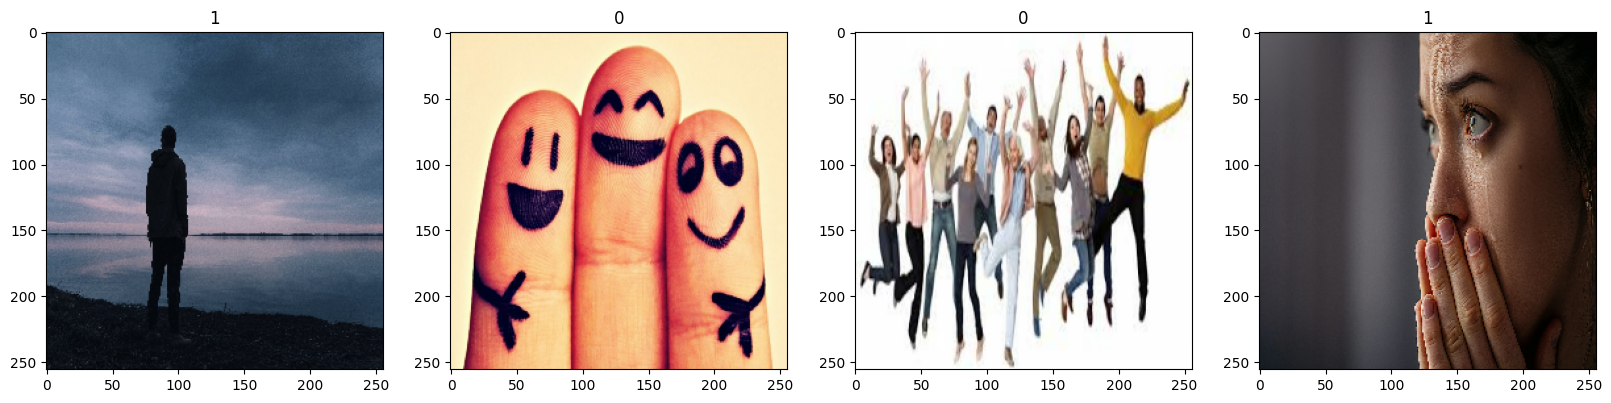

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

<h2>Preprocessing</> 


In [32]:
# scaling 
data = data.map(lambda x,y: (x/255, y))



In [33]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].max()

1.0

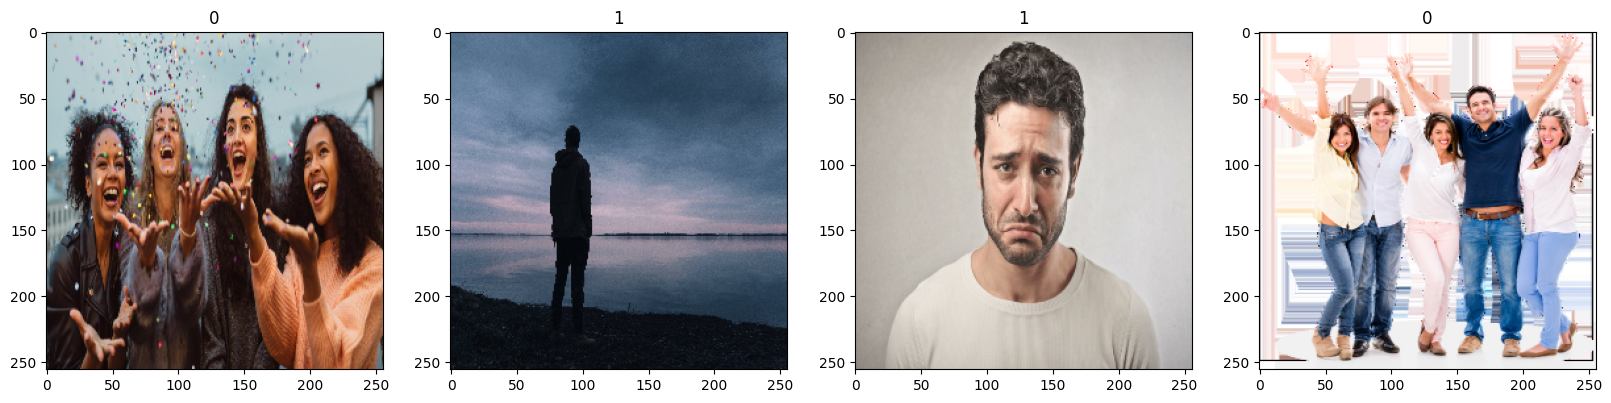

In [34]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [35]:
# split data
len(data)

6

In [36]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

In [37]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [38]:
len(train)

4

<h3>Deep Model</>

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [40]:
model = Sequential()

In [41]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\mukes\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
log_dir = 'logs'

In [45]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [48]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 430ms/step - accuracy: 0.5708 - loss: 0.7471 - val_accuracy: 0.6250 - val_loss: 0.6656
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 452ms/step - accuracy: 0.4844 - loss: 0.6701 - val_accuracy: 0.6562 - val_loss: 0.5293
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 321ms/step - accuracy: 0.6167 - loss: 0.6010 - val_accuracy: 0.8125 - val_loss: 0.5566
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 320ms/step - accuracy: 0.7531 - loss: 0.6248 - val_accuracy: 0.8750 - val_loss: 0.4412
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 389ms/step - accuracy: 0.7740 - loss: 0.5286 - val_accuracy: 0.9062 - val_loss: 0.3608
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 395ms/step - accuracy: 0.8344 - loss: 0.4534 - val_accuracy: 0.8750 - val_loss: 0.4612
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 407ms/step - accuracy: 0.8917 - loss: 0.3965 - val_accuracy: 0.9375 - val_loss: 0.2448
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 359ms/step - accuracy: 0.9115 - loss: 0.2575 - val_accuracy: 0.9062 - val_loss:

In [50]:
hist.history

{'accuracy': [0.5234375,
  0.53125,
  0.6484375,
  0.7578125,
  0.75,
  0.859375,
  0.9140625,
  0.8984375,
  0.9375,
  0.9609375,
  0.859375,
  0.9765625,
  0.9765625,
  0.9921875,
  0.9921875,
  0.9921875,
  0.984375,
  1.0,
  1.0,
  1.0],
 'loss': [0.7518731355667114,
  0.6452264189720154,
  0.5961206555366516,
  0.5985709428787231,
  0.5078333616256714,
  0.45317625999450684,
  0.36580875515937805,
  0.2558481693267822,
  0.18527907133102417,
  0.17352497577667236,
  0.30050426721572876,
  0.10523248463869095,
  0.12037570029497147,
  0.08824308216571808,
  0.05764123052358627,
  0.05113697052001953,
  0.04354550316929817,
  0.02188773639500141,
  0.015639686957001686,
  0.0106193907558918],
 'val_accuracy': [0.625,
  0.65625,
  0.8125,
  0.875,
  0.90625,
  0.875,
  0.9375,
  0.90625,
  1.0,
  0.875,
  0.96875,
  0.875,
  0.96875,
  0.96875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.6655558347702026,
  0.5293049216270447,
  0.556647539138794,
  0.4411792755126953,

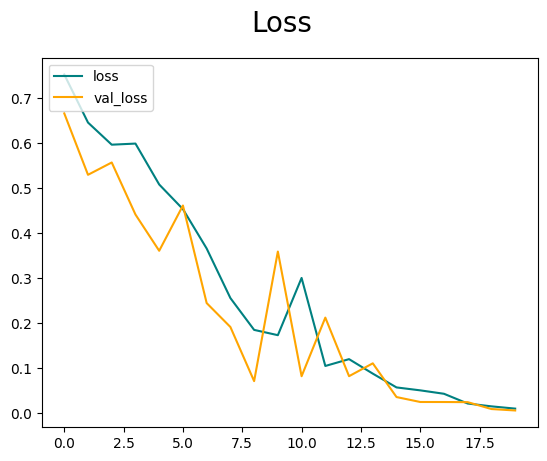

In [51]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

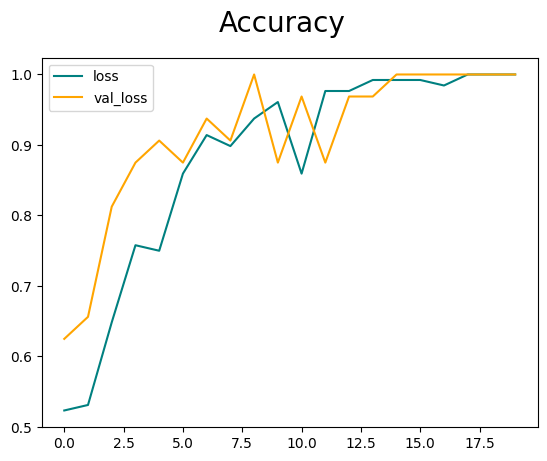

In [52]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='loss')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_loss')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [53]:
# Evaluate
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [54]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred = model.predict(X)
    pre.update_state(y, y_pred)
    re.update_state(y, y_pred)
    acc.update_state(y, y_pred)
    
print(f"Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy{acc.result().numpy()}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Precision:1.0, Recall:1.0, Accuracy1.0


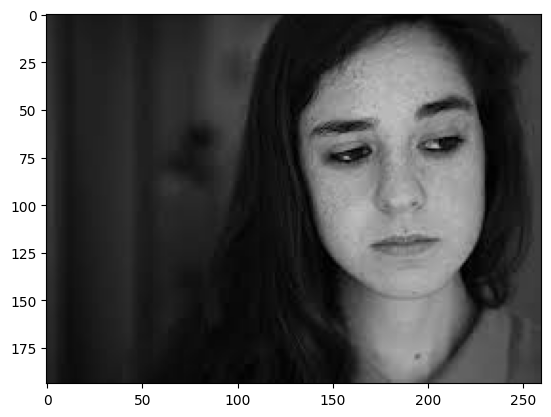

In [68]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

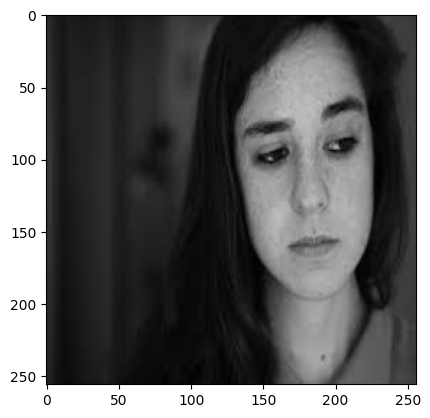

In [69]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [70]:
y_predict = model.predict(np.expand_dims(resize/255, 0))
y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[0.986578]], dtype=float32)

In [71]:
if(y_predict > 0.5):
    print('Sad')
else:
    print('Happy')

Sad


In [77]:
# Save the model 
model.save(os.path.join('model', 'happysadmodel.h5'))
